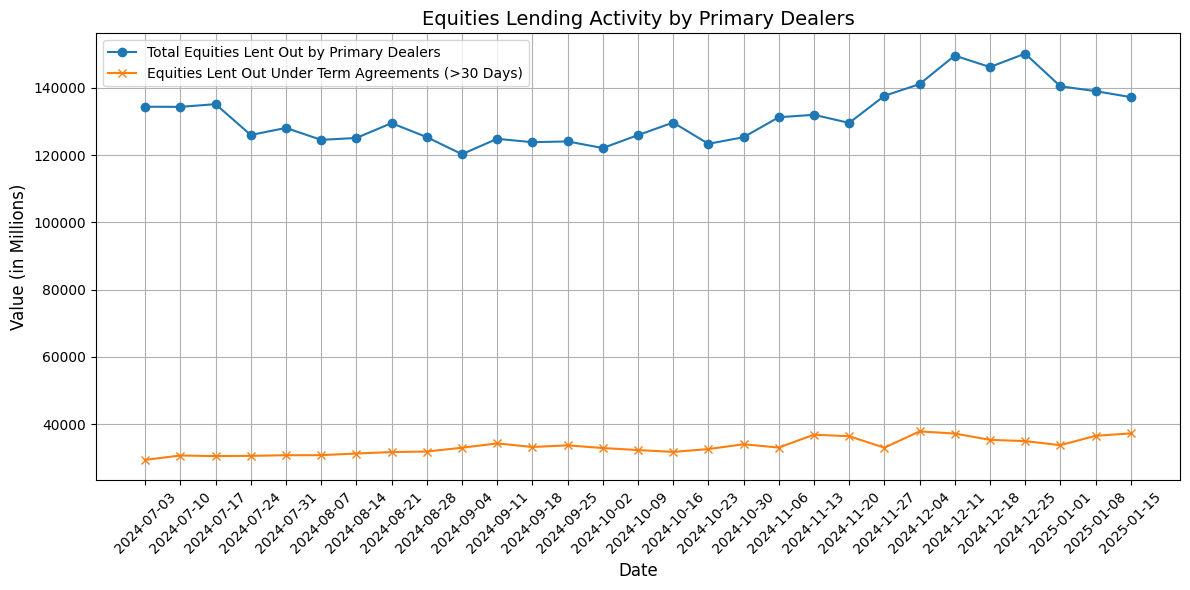

In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Reference URLs (
#   April 2013 to Dec 2014
#   https://markets.newyorkfed.org/api/pd/get/SBN2013/timeseries/PDSIOSB-E_PDSIOSB-ETAL30_PDSIOSB-ETAG30.json
#
#   Jan 2015 to Dec 2021
#   https://markets.newyorkfed.org/api/pd/get/SBN2015/timeseries/PDSIOSB-E_PDSIOSB-ETAL30_PDSIOSB-ETAG30.xlsx
#
#   Jan 2022 to Jun 2024
#   https://markets.newyorkfed.org/api/pd/get/SBN2022/timeseries/PDSIOSB-E_PDSIOSB-ETAL30_PDSIOSB-ETAG30.json
#
#   June 2024 to today
#   https://markets.newyorkfed.org/api/pd/get/SBN2024/timeseries/PDSOOS-E_PDSOOS-ETAL30_PDSOOS-ETAG30.json
# ------------------------------------------------------------------

# Just pick the current URL you want to fetch:
api_url = "https://markets.newyorkfed.org/api/pd/get/SBN2024/timeseries/PDSOOS-E_PDSOOS-ETAL30_PDSOOS-ETAG30.json"

# Fetch the data from the API
response = requests.get(api_url)
if response.status_code == 200:
    api_data = response.json()
else:
    print(f"Failed to fetch data: {response.status_code}")
    exit()

data = api_data

dates = []
total_equities = []
term_agreements = []

# Loop over the "timeseries" portion of the returned JSON
for entry in data["pd"]["timeseries"]:
    if entry["keyid"] == "PDSOOS-E":
        dates.append(entry["asofdate"])
        total_equities.append(int(entry["value"]))
    elif entry["keyid"] == "PDSOOS-ETAG30":
        term_agreements.append(int(entry["value"]))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(dates, total_equities, label="Total Equities Lent Out by Primary Dealers", marker="o")
plt.plot(dates, term_agreements, label="Equities Lent Out Under Term Agreements (>30 Days)", marker="x")

# Customize the chart
plt.title("Equities Lending Activity by Primary Dealers", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value (in Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

/Users/aidansinclair/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


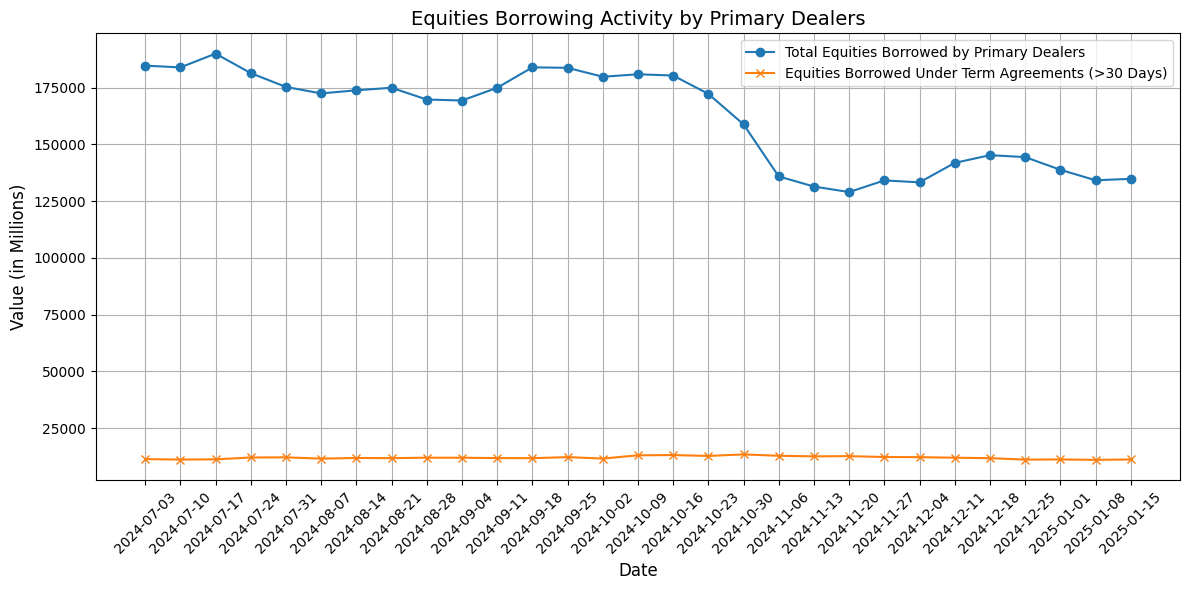

In [1]:
import requests
import matplotlib.pyplot as plt

# Define the API URL for equity borrowing in for primary dealers
api_url_borrowing = "https://markets.newyorkfed.org/api/pd/get/SBN2024/timeseries/PDSIOSB-E_PDSIOSB-ETAL30_PDSIOSB-ETAG30.json"

# Fetch the data from the API
response = requests.get(api_url_borrowing)
if response.status_code == 200:
    api_data_borrowing = response.json()
else:
    print(f"Failed to fetch data: {response.status_code}")
    exit()

data_borrowing = api_data_borrowing

dates_borrowing = []
total_equities_borrowing = []
term_agreements_borrowing = []

# Loop over the "timeseries" portion of the returned JSON
for entry in data_borrowing["pd"]["timeseries"]:
    if entry["keyid"] == "PDSIOSB-E":  # Key for total equities borrowed
        dates_borrowing.append(entry["asofdate"])
        total_equities_borrowing.append(int(entry["value"]))
    elif entry["keyid"] == "PDSIOSB-ETAG30":  # Key for term agreements (>30 days)
        term_agreements_borrowing.append(int(entry["value"]))

# Plot the data for equities borrowing in
plt.figure(figsize=(12, 6))
plt.plot(dates_borrowing, total_equities_borrowing, label="Total Equities Borrowed by Primary Dealers", marker="o")
plt.plot(dates_borrowing, term_agreements_borrowing, label="Equities Borrowed Under Term Agreements (>30 Days)", marker="x")

# Customize the chart
plt.title("Equities Borrowing Activity by Primary Dealers", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value (in Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

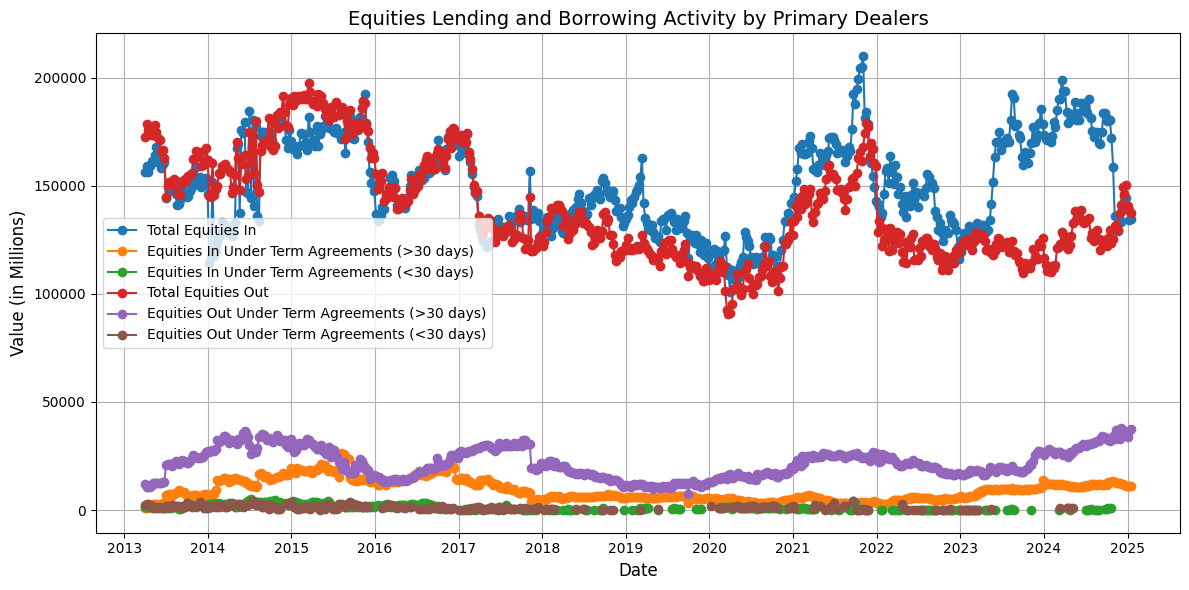

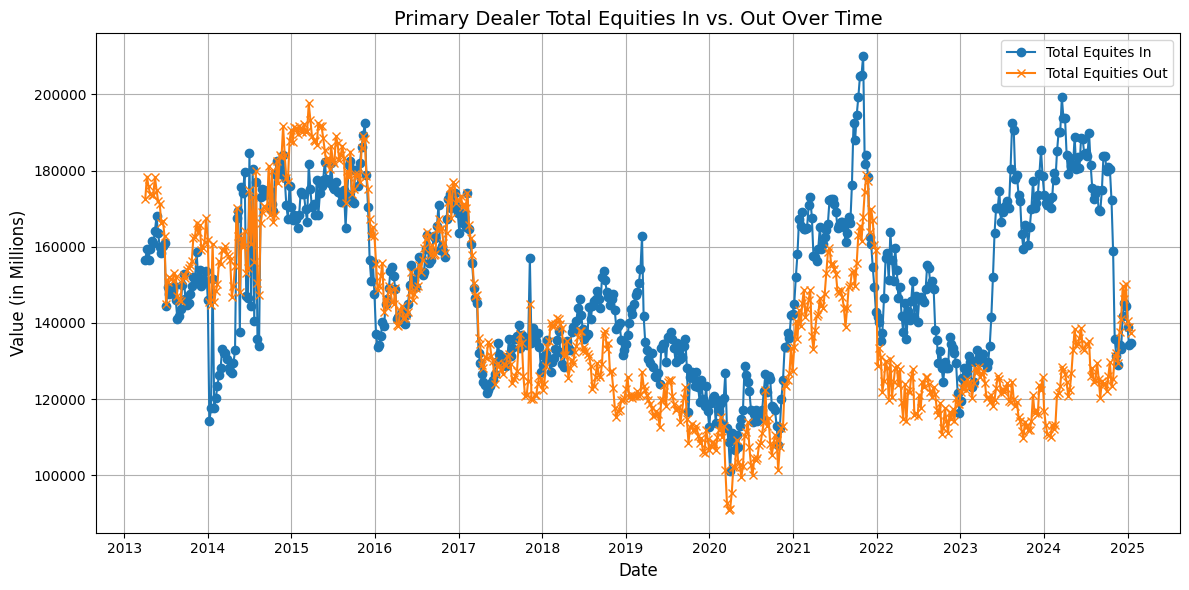

In [51]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# API URLs
urls = [
    # Securities In (Borrowed)
    "https://markets.newyorkfed.org/api/pd/get/SBN2013/timeseries/PDSIOSB-E_PDSIOSB-ETAL30_PDSIOSB-ETAG30.json",
    "https://markets.newyorkfed.org/api/pd/get/SBN2015/timeseries/PDSIOSB-E_PDSIOSB-ETAL30_PDSIOSB-ETAG30.json",
    "https://markets.newyorkfed.org/api/pd/get/SBN2022/timeseries/PDSIOSB-E_PDSIOSB-ETAL30_PDSIOSB-ETAG30.json",
    "https://markets.newyorkfed.org/api/pd/get/SBN2024/timeseries/PDSIOSB-E_PDSIOSB-ETAL30_PDSIOSB-ETAG30.json",
    # Securities Out (Lent)
    "https://markets.newyorkfed.org/api/pd/get/SBN2024/timeseries/PDSOOS-E_PDSOOS-ETAL30_PDSOOS-ETAG30.json",
    "https://markets.newyorkfed.org/api/pd/get/SBN2022/timeseries/PDSOOS-E_PDSOOS-ETAL30_PDSOOS-ETAG30.json",
    "https://markets.newyorkfed.org/api/pd/get/SBN2015/timeseries/PDSOOS-E_PDSOOS-ETAL30_PDSOOS-ETAG30.json",
    "https://markets.newyorkfed.org/api/pd/get/SBN2013/timeseries/PDSOOS-E_PDSOOS-ETAL30_PDSOOS-ETAG30.json"
]

def fetch_data_from_url(url):
    """Fetch JSON data from the given URL and return a DataFrame."""
    response = requests.get(url)
    if response.status_code == 200:
        json_data = response.json()
        # Extract the timeseries data
        data = [
            {
                "date": entry["asofdate"],
                "keyid": entry["keyid"],
                "value": entry["value"] if entry["value"] != "*" else None
            }
            for entry in json_data["pd"]["timeseries"]
        ]
        return pd.DataFrame(data)
    else:
        print(f"Failed to fetch data from {url}, status code: {response.status_code}")
        return pd.DataFrame()

# Aggregate data from all URLs
all_data = pd.DataFrame()
for url in urls:
    df = fetch_data_from_url(url)
    all_data = pd.concat([all_data, df], ignore_index=True)

# Data cleaning
all_data["date"] = pd.to_datetime(all_data["date"])
all_data["value"] = pd.to_numeric(all_data["value"], errors="coerce")  # Convert "*" to NaN
all_data.dropna(subset=["value"], inplace=True)

# Pivot the data for visualization
pivot_data = all_data.pivot(index="date", columns="keyid", values="value")

# Rename columns for better understanding
pivot_data.rename(
    columns={
        "PDSIOSB-E": "Total Equities In",
        "PDSIOSB-ETAG30": "Equities In Under Term Agreements (>30 days)",
        "PDSIOSB-ETAL30": "Equities In Under Term Agreements (<30 days)",
        "PDSOOS-E": "Total Equities Out",
        "PDSOOS-ETAG30": "Equities Out Under Term Agreements (>30 days)",
        "PDSOOS-ETAL30": "Equities Out Under Term Agreements (<30 days)"
    },
    inplace=True,
)

# First Chart: All categories (as before)
plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], label=column, marker="o")

# Customize the x-axis to show one year at a time
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Set major ticks to every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as years

# Customize the chart
plt.title("Equities Lending and Borrowing Activity by Primary Dealers", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value (in Millions)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the first plot
plt.show()

# Second Chart: Total Securities In vs. Total Securities Out
plt.figure(figsize=(12, 6))
if "Total Equities In" in pivot_data.columns and "Total Equities Out" in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data["Total Equities In"], label="Total Equites In", marker="o")
    plt.plot(pivot_data.index, pivot_data["Total Equities Out"], label="Total Equities Out", marker="x")

# Customize the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Customize the chart
plt.title("Primary Dealer Total Equities In vs. Out Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value (in Millions)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the second plot
plt.show()

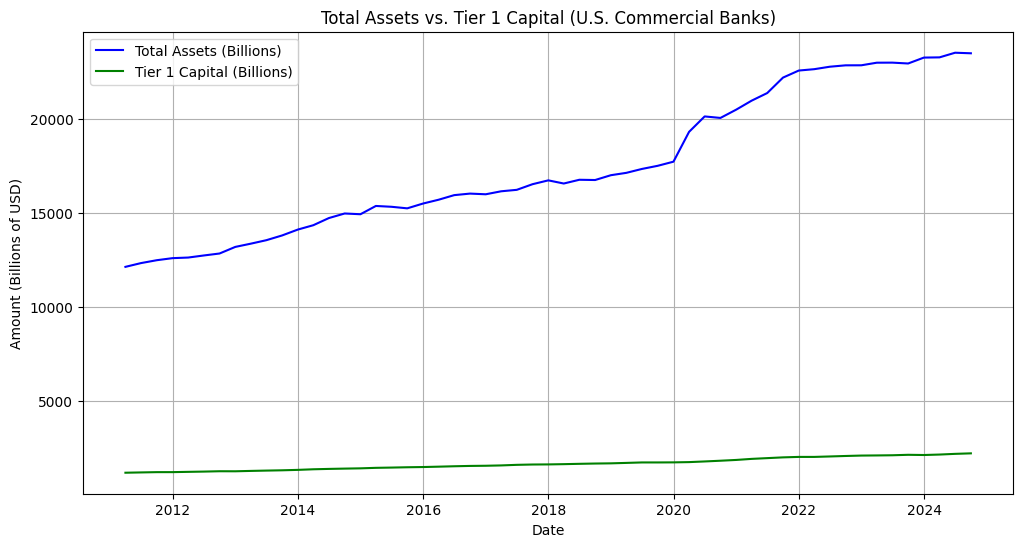

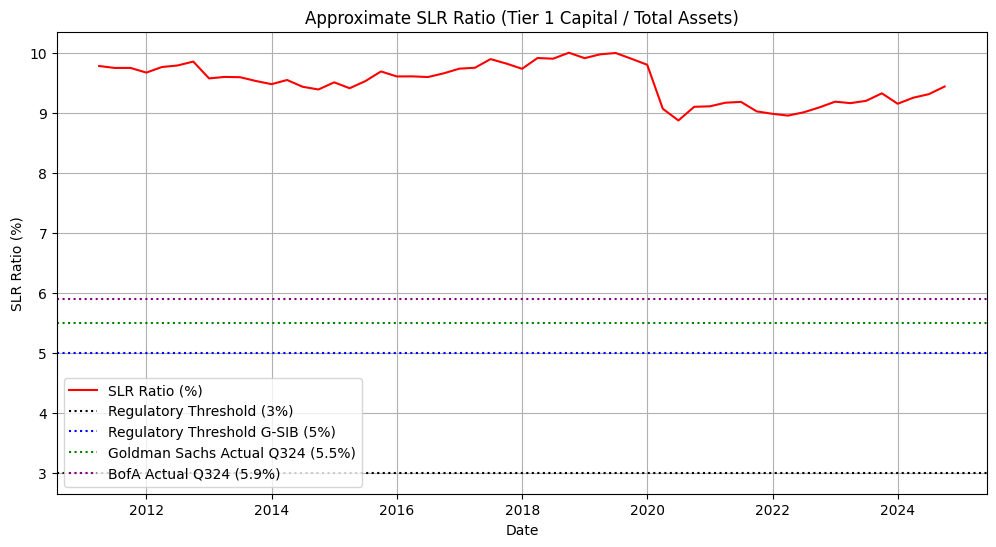

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Constants for the FRED API
FRED_API_KEY = 'b1b93f854d911b3cdc94df6dd9ec0365'  # Your FRED API key
TOTAL_ASSETS_SERIES_ID = 'TLAACBW027SBOG'  # Total Assets of All Commercial Banks series ID
BASE_URL = 'https://api.stlouisfed.org/fred/series/observations'

# Path to the Tier 1 Capital data CSV
TIER_1_DATA_PATH = "Data/Untitled 2.csv"

def fetch_fred_data(series_id, api_key):
    params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json',
        'observation_start': '2011-01-01',  # Start date for data
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        observations = data['observations']
        dates = [obs['date'] for obs in observations]
        values = [float(obs['value']) for obs in observations]
        return pd.DataFrame({'Date': dates, 'Total Assets': values})
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

# Fetch Total Assets data (in Millions)
total_assets_data = fetch_fred_data(TOTAL_ASSETS_SERIES_ID, FRED_API_KEY)

# Load Tier 1 Capital data from CSV file
try:
    tier_1_data = pd.read_csv(TIER_1_DATA_PATH, header=0)
    tier_1_data = tier_1_data.iloc[:, :2]  # Keep only first two columns
    tier_1_data.columns = ["Date", "Tier 1 Capital"]  # Rename columns
    tier_1_data["Date"] = pd.to_datetime(tier_1_data["Date"].str.strip())
except FileNotFoundError:
    print(f"File not found: {TIER_1_DATA_PATH}")
    tier_1_data = None

if total_assets_data is not None and tier_1_data is not None:
    # Convert Date to pandas DateTime and set as index
    total_assets_data["Date"] = pd.to_datetime(total_assets_data["Date"])
    total_assets_data.set_index("Date", inplace=True)

    # Resample weekly data to quarterly, taking the last weekly observation each quarter
    quarterly_assets = total_assets_data.resample("QE").last().reset_index()

    # Merge on the quarter-end dates
    combined_data = pd.merge(
        quarterly_assets,
        tier_1_data,
        on="Date",
        how="inner"
    )

    
    # Convert millions → billions for the asset & capital amounts
    combined_data['Total Assets (Billions)'] = combined_data['Total Assets']
    combined_data['Tier 1 Capital (Billions)'] = combined_data['Tier 1 Capital'] / 1000.0

    # Calculate a "Leverage Ratio" ~ Tier 1 / Total Assets
    # (Note: True SLR includes off-balance sheet exposures, so this is an approximation)
    combined_data['SLR Ratio (%)'] = (combined_data['Tier 1 Capital (Billions)'] / combined_data['Total Assets (Billions)']) * 100 
    
    # ---------- Chart 1: Total Assets vs. Tier 1 Capital (both in Billions) ----------
    plt.figure(figsize=(12, 6))
    plt.plot(combined_data['Date'], 
             combined_data['Total Assets (Billions)'],
             label='Total Assets (Billions)', color='blue')
    plt.plot(combined_data['Date'], 
             combined_data['Tier 1 Capital (Billions)'],
             label='Tier 1 Capital (Billions)', color='green')

    plt.xlabel('Date')
    plt.ylabel('Amount (Billions of USD)')
    plt.title('Total Assets vs. Tier 1 Capital (U.S. Commercial Banks)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ---------- Chart 2: SLR Ratio (%) ----------
    plt.figure(figsize=(12, 6))
    plt.plot(combined_data['Date'], 
             combined_data['SLR Ratio (%)'],
             label='SLR Ratio (%)', color='red')

    # Draw a horizontal 3% threshold line at y=3 (since the ratio is now in %)
    plt.axhline(y=3, color='black', linestyle='dotted', label='Regulatory Threshold (3%)')
    plt.axhline(y=5, color='blue', linestyle='dotted', label='Regulatory Threshold G-SIB (5%)')

    plt.axhline(y=5.5, color='green', linestyle='dotted', label='Goldman Sachs Actual Q324 (5.5%)')
    plt.axhline(y=5.9, color='purple', linestyle='dotted', label='BofA Actual Q324 (5.9%)')

    plt.xlabel('Date')
    plt.ylabel('SLR Ratio (%)')
    plt.title('Approximate SLR Ratio (Tier 1 Capital / Total Assets)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Unable to fetch or merge data. Ensure both FRED API and Tier 1 Capital data are accessible.")

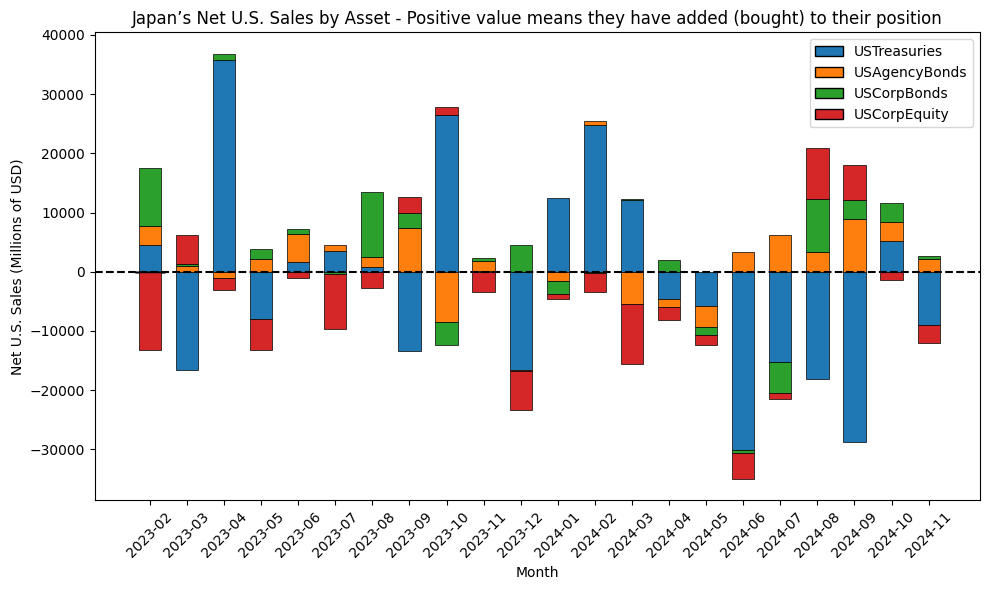

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------------
# 1) Define the data in ascending chronological order (oldest -> newest)
#    We'll assume earliest row is at the bottom (2023-02) and 
#    latest is at the top (2024-11) in your pasted table, so we invert it.
# -------------------------------------------------------------------

# We'll define the data as a list of tuples: (Date, Treasuries, Agency, CorpBonds, Equity)
# Make sure the earliest date is first (2023-02) and the latest (2024-11) is last.

data = [
    ("2023-02",  4458,   3326,  9712,  -13261),
    ("2023-03", -16567,   917,   422,   4800),
    ("2023-04", 35686,  -1129,  1166,  -2019),
    ("2023-05", -8035,   2115,  1811,  -5180),
    ("2023-06",  1675,   4678,   819,  -1009),
    ("2023-07",  3553,    977,  -385,  -9293),
    ("2023-08",   846,   1626, 11066,  -2734),
    ("2023-09", -13455,  7330,  2612,   2648),
    ("2023-10", 26423,  -8413, -3954,   1422),
    ("2023-11",   106,   1762,   456,  -3488),
    ("2023-12", -16600,  -139,  4494,  -6623),
    ("2024-01", 12429,  -1639, -2065,   -845),
    ("2024-02", 24747,    760,  -255,  -3143),
    ("2024-03", 12140,  -5483,   108, -10089),
    ("2024-04", -4584,  -1298,  1936,  -2346),
    ("2024-05", -5838,  -3518, -1313,  -1738),
    ("2024-06", -30129,  3419,  -574,  -4277),
    ("2024-07", -15315,  6277, -5141,   -997),
    ("2024-08", -18100,  3382,  8832,   8665),
    ("2024-09", -28710,  8884,  3289,   5884),
    ("2024-10",  5217,   3103,  3249,  -1435),
    ("2024-11",  -9022,  2207,   451,  -3082),
]

# Convert to a DataFrame for convenience
columns = ["Date", "USTreasuries", "USAgencyBonds", "USCorpBonds", "USCorpEquity"]
df = pd.DataFrame(data, columns=columns)

# -------------------------------------------------------------------
# 2) Create the diverging stacked bars
# -------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(10,6))

# We'll define a color for each category
category_colors = {
    "USTreasuries": "tab:blue",
    "USAgencyBonds": "tab:orange",
    "USCorpBonds": "tab:green",
    "USCorpEquity": "tab:red",
}

# We'll define the order of stacking
categories = ["USTreasuries", "USAgencyBonds", "USCorpBonds", "USCorpEquity"]

x_positions = np.arange(len(df))  # one bar per row
bar_width = 0.6

# We'll store a mapping (category -> handle) for the legend
legend_handles = {}

for i, row in df.iterrows():
    # For each month, we reset the "positive" and "negative" stack bottoms
    pos_bottom = 0
    neg_bottom = 0
    
    # We'll stack in the chosen category order
    for cat in categories:
        value = row[cat]
        color = category_colors[cat]
        
        if value >= 0:
            # This segment goes above zero
            ax.bar(
                x_positions[i],
                value,          # height
                bottom=pos_bottom,
                width=bar_width,
                color=color,
                edgecolor="black",
                linewidth=0.5
            )
            # Update the positive stack "top"
            pos_bottom += value
        else:
            # This segment goes below zero
            ax.bar(
                x_positions[i],
                value,
                bottom=neg_bottom,
                width=bar_width,
                color=color,
                edgecolor="black",
                linewidth=0.5
            )
            # Update the negative stack "bottom"
            neg_bottom += value
        
        # For legend labeling (only once per category)
        if cat not in legend_handles:
            legend_handles[cat] = ax.bar(
                0, 0, color=color, label=cat, edgecolor="black"
            )

# Format the x-axis
ax.set_xticks(x_positions)
ax.set_xticklabels(df["Date"], rotation=45)

# Add some labels / legend
ax.set_xlabel("Month")
ax.set_ylabel("Net U.S. Sales (Millions of USD)")
ax.set_title("Japan’s Net U.S. Sales by Asset - Positive value means they have added (bought) to their position")

# Build a custom legend using the stored handles
ax.legend(legend_handles.values(), legend_handles.keys(), loc="best")
ax.axhline(0, color='black', linewidth=1.5, linestyle='--')

plt.tight_layout()
plt.show()

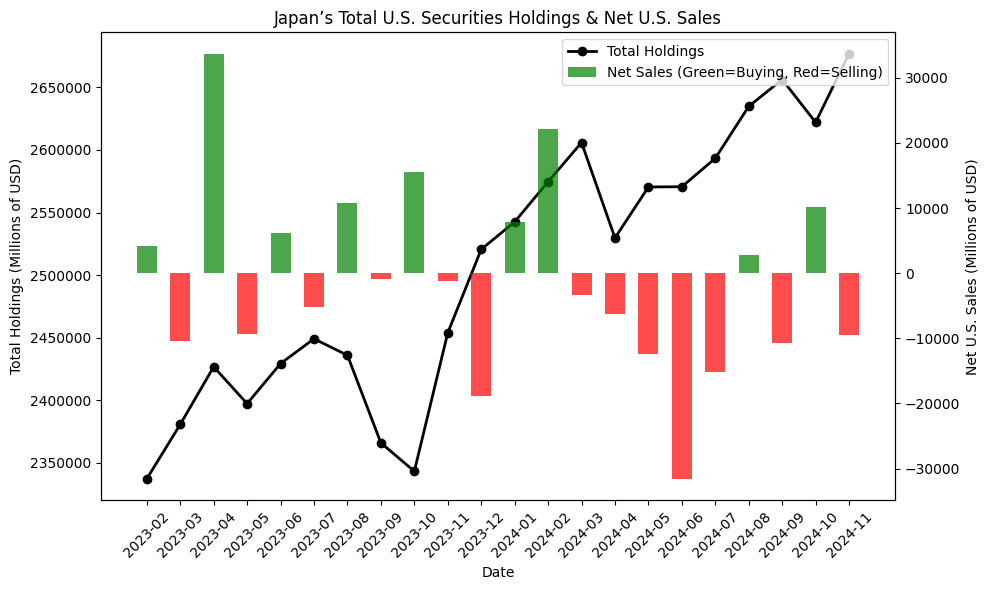

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --------------------------------------------------------
# 1) Data & Dates (in ascending chronological order)
# --------------------------------------------------------
dates = [
    "2023-02",
    "2023-03",
    "2023-04",
    "2023-05",
    "2023-06",
    "2023-07",
    "2023-08",
    "2023-09",
    "2023-10",
    "2023-11",
    "2023-12",
    "2024-01",
    "2024-02",
    "2024-03",
    "2024-04",
    "2024-05",
    "2024-06",
    "2024-07",
    "2024-08",
    "2024-09",
    "2024-10",
    "2024-11",
]

# (Holdings, NetSales)
table_data = [
    (2337237,  4235),    # 2023-02
    (2380702, -10428),   # 2023-03
    (2426726, 33704),    # 2023-04
    (2397311, -9289),    # 2023-05
    (2429313, 6163),     # 2023-06
    (2449125, -5148),    # 2023-07
    (2435921, 10804),    # 2023-08
    (2365949, -865),     # 2023-09
    (2343268, 15478),    # 2023-10
    (2453905, -1164),    # 2023-11
    (2520579, -18868),   # 2023-12
    (2542507, 7880),     # 2024-01
    (2574686, 22109),    # 2024-02
    (2605896, -3324),    # 2024-03
    (2529685, -6292),    # 2024-04
    (2570436, -12407),   # 2024-05
    (2570626, -31561),   # 2024-06
    (2593372, -15176),   # 2024-07
    (2634848, 2779),     # 2024-08
    (2656285, -10653),   # 2024-09
    (2622085, 10134),    # 2024-10
    (2677003, -9446),    # 2024-11
]

df = pd.DataFrame(table_data, columns=["Holdings", "NetSales"], index=dates)

# --------------------------------------------------------
# 2) Plot Setup
# --------------------------------------------------------
fig, ax_left = plt.subplots(figsize=(10, 6))
x = np.arange(len(df))  # numeric positions for each month

# --------------------------------------------------------
# 3) Left Axis: Total Holdings (Line Plot)
# --------------------------------------------------------
ax_left.plot(
    x,
    df["Holdings"],
    color="black",
    linewidth=2,
    marker="o",
    label="Total Holdings"
)
ax_left.set_xlabel("Date")
ax_left.set_ylabel("Total Holdings (Millions of USD)", color="black")
ax_left.tick_params(axis='y', labelcolor="black")

# Turn off scientific notation on the left y-axis
ax_left.ticklabel_format(style='plain', axis='y', useOffset=False)

# Set x-ticks and labels
ax_left.set_xticks(x)
ax_left.set_xticklabels(df.index, rotation=45)

# --------------------------------------------------------
# 4) Right Axis: Net Sales (Bar Plot)
# --------------------------------------------------------
ax_right = ax_left.twinx()  # share the same x-axis
ax_right.set_ylabel("Net U.S. Sales (Millions of USD)", color="black")
ax_right.tick_params(axis='y', labelcolor="black")

# Turn off scientific notation on the right y-axis
ax_right.ticklabel_format(style='plain', axis='y', useOffset=False)

# Determine bar colors
bar_colors = ["green" if val >= 0 else "red" for val in df["NetSales"]]

bars = ax_right.bar(
    x, 
    df["NetSales"], 
    color=bar_colors, 
    alpha=0.7,
    label="Net Sales (Green=Buying, Red=Selling)",
    width=0.6
)

# --------------------------------------------------------
# 5) Legend & Layout
# --------------------------------------------------------
# We already have two different artists on two different axes.
# To display them in one legend, gather them:
lines_labels = ax_left.get_legend_handles_labels()
bars_labels = ax_right.get_legend_handles_labels()

handles = lines_labels[0] + bars_labels[0]
labels = lines_labels[1] + bars_labels[1]

plt.title("Japan’s Total U.S. Securities Holdings & Net U.S. Sales")
plt.legend(handles, labels, loc="best")

plt.tight_layout()
plt.show()